In [123]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [124]:
hdi_df = pd.read_csv('../data-sources/Human Development Index - Full.csv')
imf_gdp_df = pd.read_csv('../data-sources/gdp-per-capita.csv')

min_year = 1990
current_datetime = datetime.now()
current_year = current_datetime.year


In [125]:
column_list = [col for col in hdi_df.columns if col.startswith('Human Development Index (') and (int(col.replace(')', '').replace('Human Development Index (', '')) >= min_year) and (int(col.replace(')', '').replace('Human Development Index (', '')) <= current_year)]
column_list = ['Country'] + column_list

hdi_clean_df = hdi_df[column_list].dropna()
clean_df_columns = hdi_clean_df.columns
clean_df_columns = [col.replace(')', '').replace('Human Development Index (', '') for col in clean_df_columns]
hdi_clean_df.columns = clean_df_columns
hdi_clean_df.reset_index(drop=True, inplace=True)
hdi_clean_df = pd.melt(hdi_clean_df, id_vars=['Country'], var_name='Year').sort_values(by=['Country', 'Year'])
hdi_clean_df

,Country,Year,value
0,Afghanistan,1990,0.273
141,Afghanistan,1991,0.279
282,Afghanistan,1992,0.287
423,Afghanistan,1993,0.297
564,Afghanistan,1994,0.292
...,...,...,...
3947,Zimbabwe,2017,0.594
4088,Zimbabwe,2018,0.602
4229,Zimbabwe,2019,0.601
4370,Zimbabwe,2020,0.600


In [126]:
imf_gdp_df
column_list = [col for col in imf_gdp_df.columns if col.startswith('y') and (int(col.replace('y', '')) >= min_year) and (int(col.replace('y', '')) <= current_year)]
column_list = ['Country'] + column_list
clean_imf_gdp_df = imf_gdp_df[column_list].dropna()
clean_df_columns = clean_imf_gdp_df.columns
clean_df_columns = [col.replace('y', '') for col in clean_df_columns]
clean_imf_gdp_df.columns = clean_df_columns
clean_imf_gdp_df.rename(columns={'Countr': 'Country'}, inplace=True)
clean_imf_gdp_df.reset_index(drop=True, inplace=True)
clean_imf_gdp_df = pd.melt(clean_imf_gdp_df, id_vars=['Country'], var_name='Year').sort_values(by=['Country', 'Year'])
clean_imf_gdp_df

,Country,Year,value
131,Afghanistan,1990,359.01
363,Afghanistan,1991,359.14
595,Afghanistan,1992,330.10
827,Afghanistan,1993,282.62
1059,Afghanistan,1994,252.16
...,...,...,...
7179,Zimbabwe,2020,1320.88
7411,Zimbabwe,2021,1377.23
7643,Zimbabwe,2022,1404.75
7875,Zimbabwe,2023,1429.98


In [127]:
hdi_gdp_combined_df = pd.merge(hdi_clean_df, clean_imf_gdp_df, on=['Country', 'Year'], how='inner')
hdi_gdp_combined_df

,Country,Year,value_x,value_y
0,Afghanistan,1990,0.273,359.01
1,Afghanistan,1991,0.279,359.14
2,Afghanistan,1992,0.287,330.10
3,Afghanistan,1993,0.297,282.62
4,Afghanistan,1994,0.292,252.16
...,...,...,...,...
4091,Zimbabwe,2017,0.594,1525.54
4092,Zimbabwe,2018,0.602,1573.55
4093,Zimbabwe,2019,0.601,1421.09
4094,Zimbabwe,2020,0.600,1320.88


In [128]:
hdi_gdp_combined_df.rename(columns={'value_x': 'HDI', 'value_y': 'GDP'}, inplace=True)
hdi_gdp_combined_df

In [67]:
hdi_gdp_combined_df.set_index(['Country', 'Year'], inplace=True)

In [76]:
hdi_gdp_combined_df.head()

HDI    GDP
Country Year              
Albania 1990  0.647  2.221
        1991  0.629  1.333
        1992  0.614  0.843
        1993  0.617  1.461
        1994  0.624  2.361

In [80]:
hdi_gdp_combined_df['GDP'] = hdi_gdp_combined_df['GDP'].astype(float)

<Axes: xlabel='Year'>

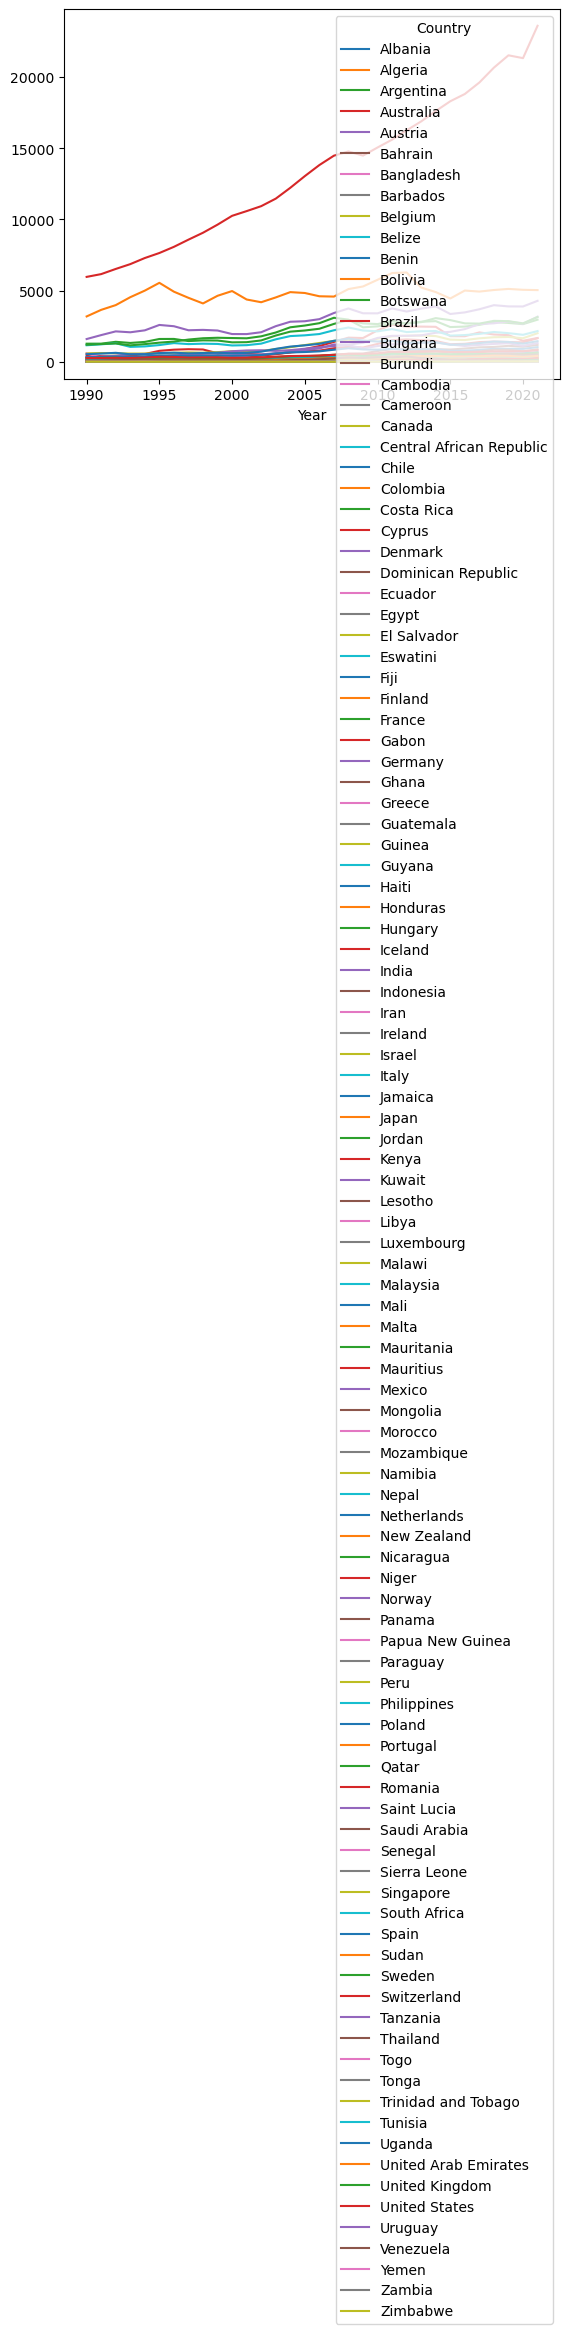

In [81]:
hdi_gdp_combined_df['GDP'].unstack(level='Country').plot()

<Axes: xlabel='Year'>

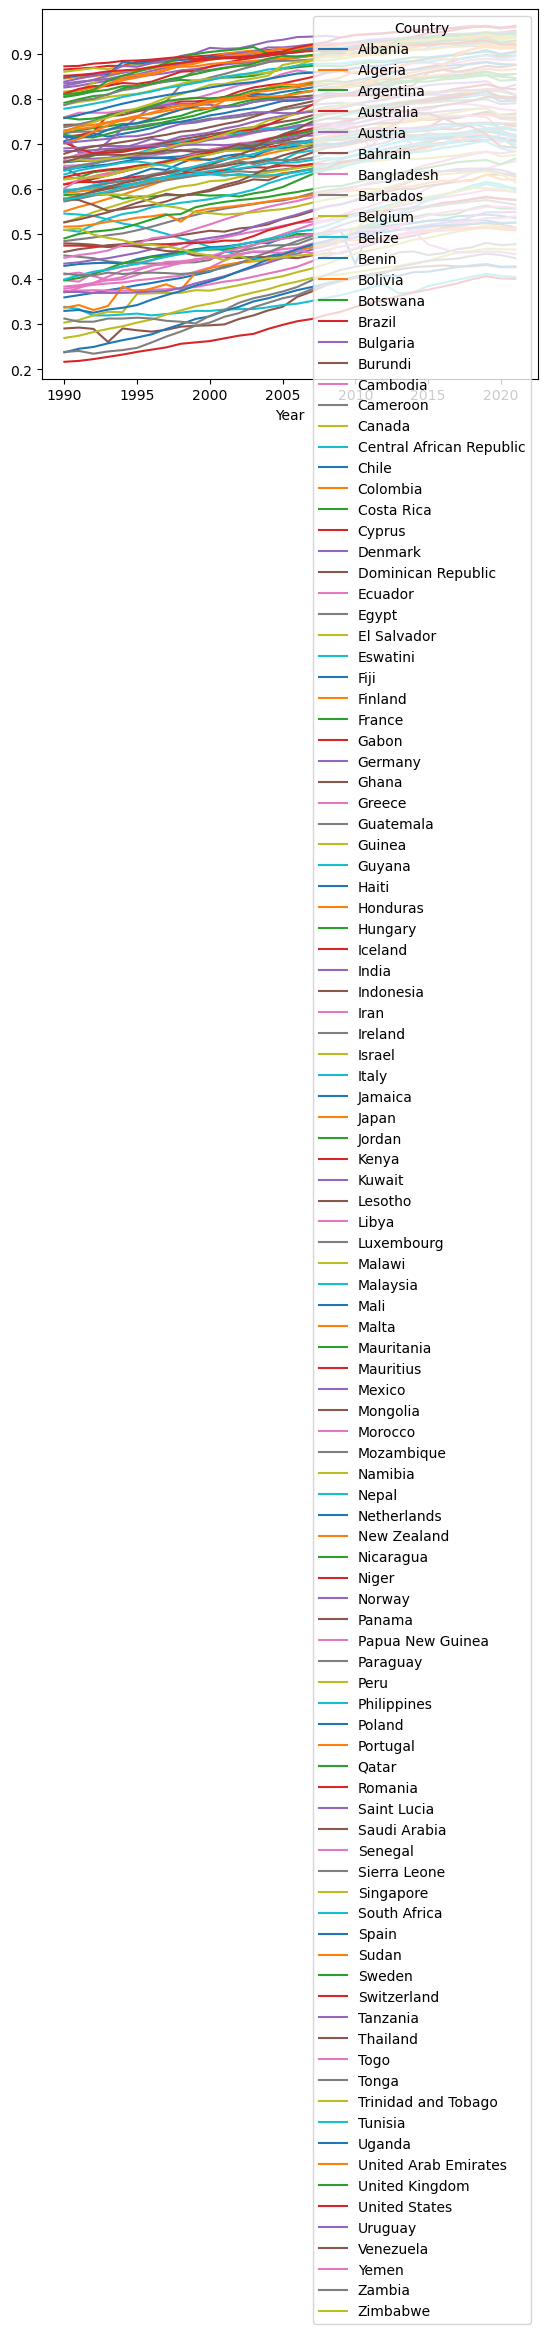

In [70]:
hdi_gdp_combined_df['HDI'].unstack(level='Country').plot()

<Axes: xlabel='HDI', ylabel='GDP'>

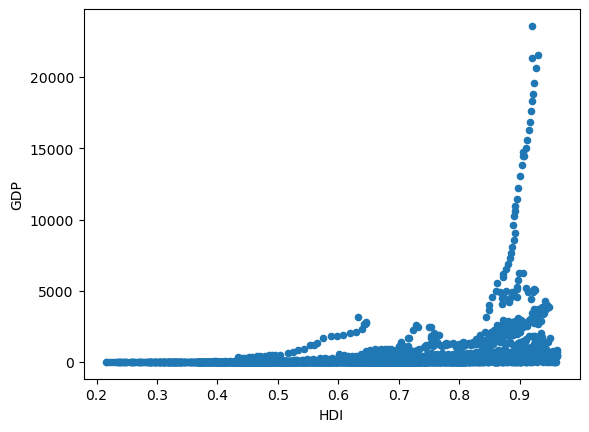

In [82]:
hdi_gdp_combined_df.plot.scatter(x='HDI', y='GDP')

In [83]:
average_by_country_df = hdi_gdp_combined_df.groupby(level='Country').mean()
average_by_country_df

,HDI,GDP
Country,,
Albania,0.716750,8.208125
Algeria,0.679969,123.891656
Argentina,0.800656,362.492687
Australia,0.909406,862.936531
Austria,0.883188,319.449000
...,...,...
Uruguay,0.768500,35.384719
Venezuela,0.715375,139.910875
Yemen,0.459344,20.839469


In [84]:
average_by_country_df.corr()

,HDI,GDP
HDI,1.000000,0.288755
GDP,0.288755,1.000000


<Axes: xlabel='GDP', ylabel='HDI'>

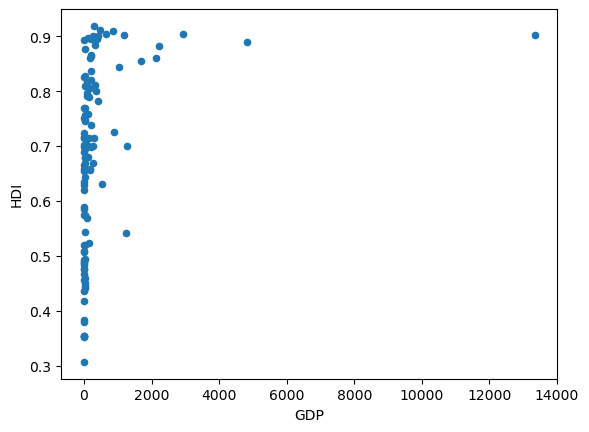

In [86]:
average_by_country_df.plot.scatter(x='GDP', y='HDI')

In [ ]:
# Add the linear regression equation and line to plot
x_values = average_by_country_df['GDP']
y_values = average_by_country_df['HDI']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

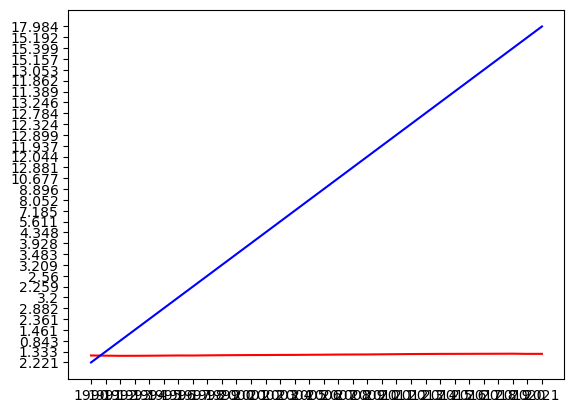

In [66]:

#hdi_gdp_combined_df.plot.line(x='Year', y='HDI', figsize=(20, 10), title='Human Development')
hdi_gdp_combined_albania_df = hdi_gdp_combined_df[hdi_gdp_combined_df['Country'] == 'Albania']
hdi_gdp_combined_albania_df[['Year', 'GDP']]
#plt.plot(hdi_gdp_combined_albania_df['Year'], hdi_gdp_combined_albania_df['HDI'], color='red')
#plt.plot(hdi_gdp_combined_albania_df['Year'], hdi_gdp_combined_albania_df['GDP'], color='blue')